# FRED Data Analysis Project
This notebook handles data retrieval, processing, and analysis for the FRED project.

# Imports

In [18]:
import os
import sys
import requests
from datetime import datetime
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from fpdf import FPDF

# Project setup

In [19]:
# Determine the main project folder (one level above the notebooks/ folder)
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Define folders relative to the main project directory
data_dir = os.path.join(project_dir, "data")
results_dir = os.path.join(project_dir, "results")
scripts_dir = os.path.join(project_dir,"scripts")

# Add the project directory to the Python path
sys.path.insert(0, project_dir)

# Add folder to the Python path
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

if results_dir not in sys.path:
    sys.path.append(results_dir)
    
# print("Folders added to sys.path:")
# print("\n".join(sys.path))
#print(sys.path)

In [20]:
# Create folders if they don't exist
for folder in [data_dir, results_dir, scripts_dir]:
    os.makedirs(folder, exist_ok=True)

print(f"Project directory: {project_dir}")
print(f"Data directory: {data_dir}")
print(f"Results directory: {results_dir}")
print(f"Scripts directory: {scripts_dir}")


Project directory: /data/data/com.termux/files/home/projects/fred_data_project
Data directory: /data/data/com.termux/files/home/projects/fred_data_project/data
Results directory: /data/data/com.termux/files/home/projects/fred_data_project/results
Scripts directory: /data/data/com.termux/files/home/projects/fred_data_project/scripts


# Data loading

In [21]:
# Set up fred environment
import fred_config

In [22]:
# Fetch the FRED data for US yields

series_ids = ["DGS3MO","DGS2", "DGS5", "DGS10"]

us_yields = fred_config.fetch_fred_data(series_ids, start_date="", frequency="")

#us_yields.rename(columns=fred_config.FRED_SERIES, inplace=True)


# Data processing

In [23]:

print(us_yields.head())  # Inspect the first few rows


            DGS3MO   DGS2   DGS5  DGS10
1981-09-01   17.01  16.78  16.12  15.41
1981-09-02   16.65  16.78  16.09  15.40
1981-09-03   16.96  16.90  16.14  15.48
1981-09-04   16.64  16.89  16.17  15.51
1981-09-07     NaN    NaN    NaN    NaN


# Analysis

# Results and visualization

In [24]:
# Load charting config
from charting import create_chart

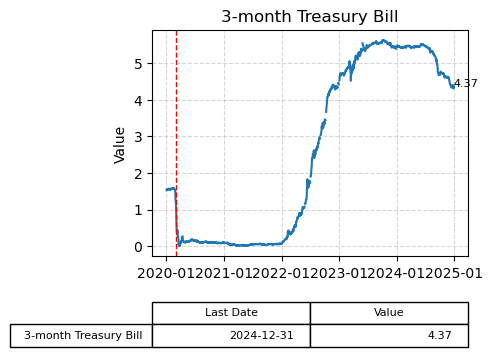

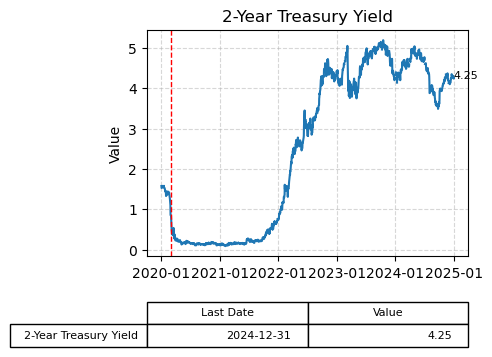

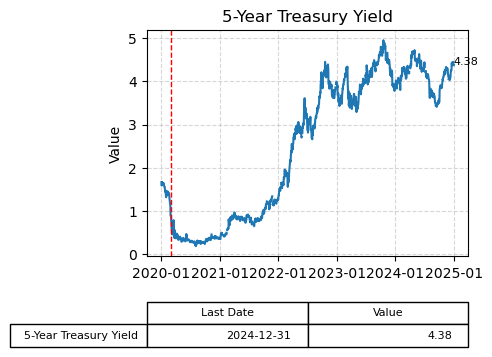

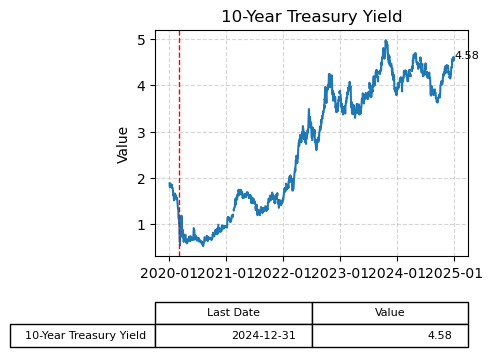

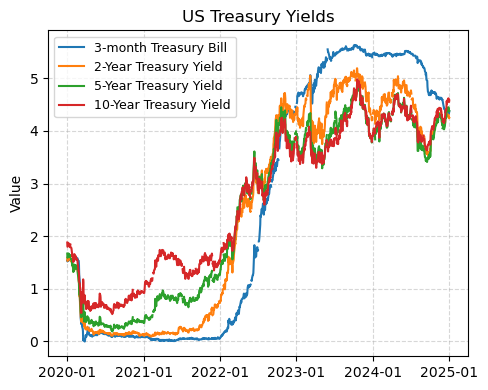

In [27]:
# US charts

# Extract column names from the DataFrame
us_yields_ids = us_yields.columns.tolist()

# Loop to create individual charts for each series
for series in us_yields_ids:
    create_chart(us_yields, [series], start_date="2020-01-01", show_data_label=True,
                 title=None, vlines=["2020-03-01"], show_table=True,
                 save_path=f"{results_dir}/{series}_chart.png")

# Create a single chart for the entire group
create_chart(us_yields, us_yields_ids, start_date="2020-01-01", title="US Treasury Yields",
             show_data_label=False, vlines=None, show_table=False,
             save_path=f"{results_dir}/us_yields_chart.png")


